<a href="https://colab.research.google.com/github/Jithin6055/word/blob/main/word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data



In [3]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Download the Punkt sentence tokenizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())
    # Lemmatization and stop words removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from gensim import corpora, models

# Preprocess the documents using the function you defined earlier
processed_docs = [preprocess(doc) for doc in documents]

# Tokenize the preprocessed documents
tokenized_docs = [doc.split() for doc in processed_docs]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"god" + 0.010*"one" + 0.009*"people" + 0.008*"would" + 0.007*"say" + 0.005*"think" + 0.005*"christian" + 0.005*"believe" + 0.005*"know" + 0.005*"u"
Topic: 1 
Words: 0.014*"said" + 0.010*"child" + 0.009*"one" + 0.008*"fire" + 0.007*"went" + 0.007*"fbi" + 0.006*"woman" + 0.006*"people" + 0.006*"could" + 0.006*"day"
Topic: 2 
Words: 0.132*"x" + 0.014*"file" + 0.013*"entry" + 0.008*"output" + 0.007*"echo" + 0.007*"bank" + 0.006*"int" + 0.006*"program" + 0.005*"return" + 0.005*"germany"
Topic: 3 
Words: 0.014*"would" + 0.011*"one" + 0.009*"like" + 0.009*"get" + 0.007*"think" + 0.007*"know" + 0.007*"time" + 0.006*"good" + 0.006*"could" + 0.005*"much"
Topic: 4 
Words: 0.008*"space" + 0.007*"q" + 0.006*"information" + 0.005*"program" + 0.005*"president" + 0.005*"research" + 0.005*"university" + 0.005*"new" + 0.004*"national" + 0.004*"year"
Topic: 5 
Words: 0.034*"key" + 0.014*"chip" + 0.011*"encryption" + 0.008*"use" + 0.008*"clipper" + 0.008*"de" + 0.008*"message" + 0.0

In [5]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.1 MB/s eta 0:00:00


In [6]:
import pyLDAvis.gensim

# Prepare visualization data
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

In [7]:
pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-08-25 18:05:36--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.57.120, 54.231.203.120, 52.217.233.136, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.57.120|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-25 18:05:36 ERROR 404: Not Found.



In [11]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained GloVe model (e.g., 100-dimensional vectors)
glove_model = api.load('glove-wiki-gigaword-100')

def get_document_embedding_glove(doc, model):
    """Generate a document embedding by averaging word embeddings using GloVe."""
    words = doc.split()
    valid_words = [word for word in words if word in model]  # Filter words present in the model
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)  # Average embeddings of valid words
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words

# Example usage:
document_embedding = get_document_embedding_glove(processed_docs[0], glove_model)
print(document_embedding)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [10]:
import numpy as np


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained GloVe model (e.g., 100-dimensional vectors)
glove_model = api.load('glove-wiki-gigaword-100')

def get_document_embedding_glove(doc, model):
    """Generate a document embedding by averaging word embeddings using GloVe."""
    words = doc.split()
    valid_words = [word for word in words if word in model]  # Filter words present in the model
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)  # Average embeddings of valid words
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words

# Example usage:
document_embedding = get_document_embedding_glove(processed_docs[0], glove_model)
print(document_embedding)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-5.83005510e-02  1.92487851e-01  3.75593990e-01 -4.18531507e-01
 -2.53381819e-01  2.11109489e-01  5.82107529e-02  9.33241565e-03
 -1.57598421e-01 -2.25056693e-01 -4.42447178e-02 -9.51524358e-03
  5.17008565e-02 -1.78459838e-01  8.70707110e-02 -1.29473172e-02
 -1.12643152e-01  1.49924755e-01 -1.17882937e-01  2.89395988e-01
  2.90943027e-01  2.30136961e-01 -1.52796552e-01 -1.89145748e-03
  3.12691689e-01 -5.42850196e-02 -1.80825323e-01 -3.36270303e-01
  1.88557327e-01 -1.83792114e-01 -1.75746307e-01  3.98530781e-01
  3.23409811e-02 -9.77592263e-03  7.68018067e-02  6.89206347e-02
 -2.59315699e-01  2.16774911e-01 -5.54757528e-02 -1.87948734e-01
 -1.31274104e-01 -2.24337623e-01  1.23906493e-01 -3.35597217e-01
 -1.65453941e-01 -9.74458680e-02  1.76843777e-01 -2.38579795e-01
  1.11415319e-01 -6.80487037e-01  3.56149748e-02 -1.73061311e-01
  1.67783145e-02  7.36436963e-01 -1.05549000e-01 -1.79178023e+00
  8.24271608e-03  1.11214951e-01  9.62657213e-01  4.05294865e-01
 -2.02118754e-01  6.06636

In [13]:
def get_lda_topic_distribution(doc, lda_model, dictionary, num_topics):
    bow_vector = dictionary.doc2bow(doc.split())
    lda_vector = lda_model[bow_vector]
    # Initialize a vector of zeros for the full topic space
    topic_distribution = np.zeros(num_topics)
    # Populate the vector with topic probabilities
    for topic_id, prob in lda_vector:
        topic_distribution[topic_id] = prob
    return topic_distribution

# Get the number of topics from the LDA model
num_topics = lda_model.num_topics

# Convert documents to LDA topic vectors
lda_topic_vectors = np.array([get_lda_topic_distribution(doc, lda_model, dictionary, num_topics) for doc in processed_docs])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from gensim import corpora, models
import numpy as np

# Assuming you have preprocessed documents and created the corpus and dictionary
# Example: processed_docs = [...]
# Example: dictionary = corpora.Dictionary(tokenized_docs)
# Example: corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Get topic distributions for each document
lda_topic_distributions = np.array([lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus])

# Convert the topic distributions to a dense matrix (if needed)
lda_topic_vectors = np.array([[topic_prob for _, topic_prob in doc] for doc in lda_topic_distributions])

print("LDA Topic Vectors:\n", lda_topic_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Topic Vectors:
 [[1.44948415e-03 2.62231734e-02 1.44957181e-03 ... 1.44983886e-03
  1.44955213e-03 2.37989873e-01]
 [3.57388565e-03 3.57451732e-03 3.57375969e-03 ... 9.05374765e-01
  3.57369357e-03 3.57487216e-03]
 [1.40849769e-01 5.35263896e-01 1.03153158e-02 ... 8.96141573e-04
  8.96093436e-04 8.96063983e-04]
 ...
 [2.00546975e-03 2.00564694e-03 2.00547301e-03 ... 5.76020956e-01
  1.07014753e-01 3.22697535e-02]
 [6.88581988e-02 4.76422906e-03 4.76446236e-03 ... 4.76481998e-03
  4.76436736e-03 4.76472266e-03]
 [6.13051876e-02 7.41308555e-02 9.20054619e-04 ... 3.42495054e-01
  9.20257415e-04 2.42947768e-02]]


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume lda_topic_vectors is a NumPy array where each row represents a document vector
# Example: lda_topic_vectors = np.array([...])

# Calculate cosine similarity between document vectors
lda_similarity_matrix = cosine_similarity(lda_topic_vectors)

# Display the similarity matrix
print("Cosine Similarity Matrix:\n", lda_similarity_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cosine Similarity Matrix:
 [[1.         0.01196956 0.47952256 ... 0.3903269  0.06960297 0.74687657]
 [0.01196956 1.         0.00776294 ... 0.90140724 0.07826597 0.61808423]
 [0.47952256 0.00776294 1.         ... 0.19399692 0.02585777 0.50352838]
 ...
 [0.3903269  0.90140724 0.19399692 ... 1.         0.0116559  0.85595263]
 [0.06960297 0.07826597 0.02585777 ... 0.0116559  1.         0.10572164]
 [0.74687657 0.61808423 0.50352838 ... 0.85595263 0.10572164 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


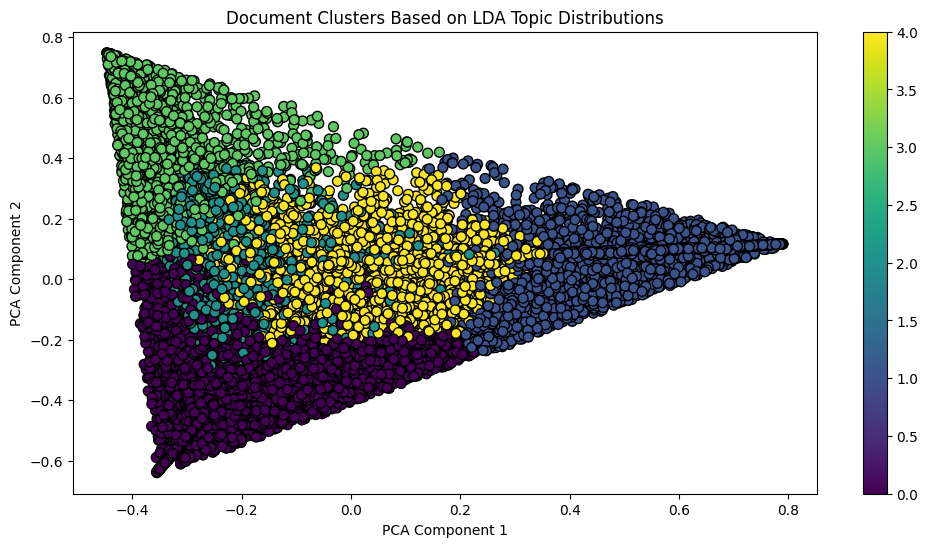

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Calculate cosine similarity between LDA topic vectors
lda_similarity_matrix = cosine_similarity(lda_topic_vectors)

# Perform K-Means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
lda_labels = kmeans.fit_predict(lda_topic_vectors)

# Visualize clusters using PCA
pca = PCA(n_components=2)
lda_reduced = pca.fit_transform(lda_topic_vectors)

# Adjust the figure size (change the width and height as needed)
plt.figure(figsize=(12, 6))  # Change this to your desired size
plt.scatter(lda_reduced[:, 0], lda_reduced[:, 1], c=lda_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Document Clusters Based on LDA Topic Distributions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
